In [34]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = 'Cleaned_df_without_school.csv'
data = pd.read_csv(file_path)

In [35]:
data.columns

Index(['Country', 'Life Expectancy', 'Alchohol Consumption', 'GDP',
       'Pollution', 'Hospital Beds', 'Drug_use', 'Security Apparatus'],
      dtype='object')

In [36]:
# Prepare data for regression
X = data.drop(['Life Expectancy', 'Country'], axis=1)  # Independent variables
y = data['Life Expectancy']  # Dependent variable
X = sm.add_constant(X)  # Adding a constant to the model (for intercept)

# OLS regression
model = sm.OLS(y, X).fit()

print("OLS Model Summary:\n", model.summary())



OLS Model Summary:
                             OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     21.05
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           7.43e-15
Time:                        18:33:56   Log-Likelihood:                -238.96
No. Observations:                  90   AIC:                             491.9
Df Residuals:                      83   BIC:                             509.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

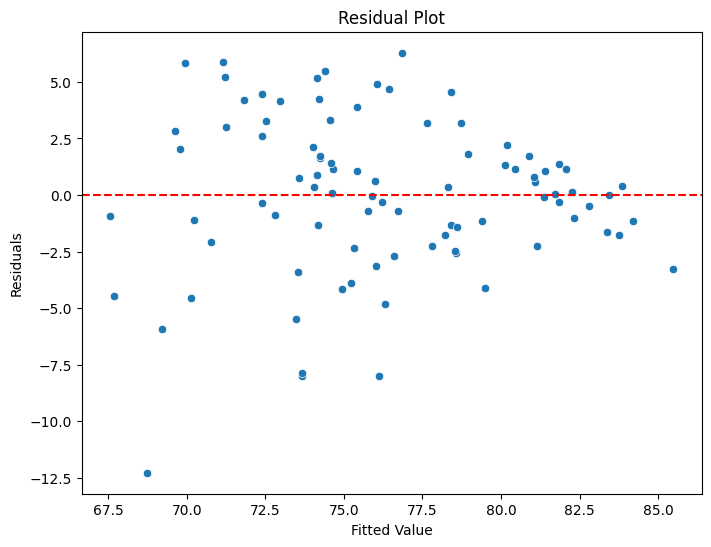

In [37]:
#Residual Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model1 is already fitted and X, y are defined
predictions = model.predict(X)
residuals = y - predictions

# Plotting the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


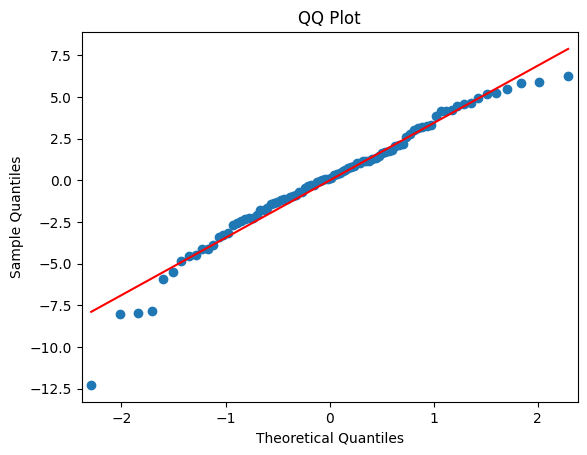

In [38]:
#QQ Plot
import matplotlib.pyplot as plt
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot')
plt.show()

In [39]:
#mse
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
mse
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 3.442400543957316


In [40]:
#J-B Test (Normality)
jb_test = sm.stats.jarque_bera(model.resid)
jb_test

(9.701243939578278,
 0.007823510048768209,
 -0.6551481569173848,
 3.9328032771375514)

In [41]:
#BP Test (Homoscedasticity)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test


(17.190722640751144,
 0.008607285354182781,
 3.266135926017164,
 0.006216407543752477)

In [42]:
#White Test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid, model.model.exog)
white_test

(47.171059371940835,
 0.009487380380042439,
 2.5291012885150836,
 0.0013402197738827707)

In [43]:
#D-B Test (autocorrelation)
dw_test = sm.stats.durbin_watson(model.resid)
dw_test

1.0415234017080435

In [44]:
#VIF
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = data

# Calculating VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

Feature        VIF
0                 const  41.039780
1  Alchohol Consumption   4.289904
2                   GDP   1.338231
3             Pollution   1.893653
4         Hospital Beds   2.714433
5              Drug_use   2.028891
6    Security Apparatus   2.147858

In [45]:
#WLS Regression
# Calculate the squared residuals
squared_residuals = model.resid ** 2

# Fit a WLS model using squared residuals as weights
wls_model = sm.WLS(y, X, weights=1/squared_residuals).fit()

# Summary of the WLS model
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.52e-117
Time:                        18:33:56   Log-Likelihood:                -167.84
No. Observations:                  90   AIC:                             349.7
Df Residuals:                      83   BIC:                             367.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   81.7254 

In [46]:
#J-B Test (Normality)
jb_test = sm.stats.jarque_bera(wls_model.resid)
jb_test

(10.333711182059307,
 0.005702471560426497,
 -0.6707705226027902,
 3.977713628443694)

In [66]:
#BP Test (Homoscedasticity)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(wls_model.resid, wls_model.model.exog)
bp_test


(16.762469879892006,
 0.010197010300368963,
 3.1661476425847033,
 0.007585860759141296)

In [48]:
#White Test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(wls_model.resid, wls_model.model.exog)
white_test

(47.244562765774894,
 0.00931223409873856,
 2.5373969141015857,
 0.0012936902654928331)

In [49]:
#D-B Test (autocorrelation)
dw_test = sm.stats.durbin_watson(wls_model.resid)
dw_test

1.0293321976338294

In [50]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import skew, kurtosis
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Assuming 'data' is your DataFrame and 'y' is your target variable
X = data.drop(['Country', 'Life Expectancy'], axis=1)
y = data['Life Expectancy'].values

# Split the dataset into training and testing sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape y_train and y_test for scaling
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [102]:
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data['Life Expectancy'] = y_train

test_data = pd.DataFrame(X_test, columns=X.columns)
test_data['Life Expectancy'] = y_test

# Export to CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [95]:


# Scaling X and y
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Flatten the y arrays back to 1D
y_train = y_train.ravel()
y_test = y_test.ravel()


# Perform Lasso regression
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

## Calculate residuals from Ridge regression
lasso_residuals = y_train - lasso.predict(X_train)

# Durbin-Watson Test
dw = sm.stats.durbin_watson(lasso_residuals)

# Jarque-Bera Test
jb_test_stat, jb_p_value, skewness, kurtosis_val = jarque_bera(lasso_residuals)

# Breusch-Pagan as it's more commonly used
white_test_stat, white_p_value, f_value, f_p_value = het_breuschpagan(lasso_residuals, sm.add_constant(X_train))

# VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = ['const'] + list(X.columns)
vif_data["VIF"] = [variance_inflation_factor(np.column_stack((np.ones(X_train.shape[0]), X_train)), i) for i in range(X_train.shape[1] + 1)]

#R-squared
r2 = r2_score(y_test, y_pred)

# Displaying the results
print("Lasso Coefficients:", lasso.coef_)
print("Mean Squared Error:", mse)
print("Durbin-Watson:", dw)
print("Jarque-Bera Test:", jb_test_stat, jb_p_value)
print("BP Test:", white_test_stat, white_p_value)
print("VIF:\n", vif_data)
print("R-squared:", r2)

rmse = np.sqrt(mse)
print(f"MSE:{mse}")
print(f"RMSE: {rmse}")
lasso.alpha_

Lasso Coefficients: [ 0.          0.08297808 -0.08313147 -0.          0.18892744 -0.48812079]
Mean Squared Error: 0.5536724718512834
Durbin-Watson: 2.0107872917815244
Jarque-Bera Test: 3.1626751150188905 0.20569977883431348
BP Test: 10.900483991366325 0.09150122082215299
VIF:
                 Feature       VIF
0                 const  1.000000
1  Alchohol Consumption  4.721881
2                   GDP  1.619953
3             Pollution  2.074627
4         Hospital Beds  3.102471
5              Drug_use  2.013875
6    Security Apparatus  2.177758
R-squared: 0.5526723090357223
MSE:0.5536724718512834
RMSE: 0.7440917093015372


0.07723059197898297

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np


# Perform Ridge regression
ridge = RidgeCV(cv=5,alphas = (1,0.3,0.1,0.01,0.001))
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate residuals from Ridge regression
ridge_residuals = y_train - ridge.predict(X_train)

# Durbin-Watson Test
dw = sm.stats.durbin_watson(ridge_residuals)

# Jarque-Bera Test
jb_test_stat, jb_p_value, skewness, kurtosis_val = jarque_bera(ridge_residuals)

# Breusch-Pagan as it's more commonly used)
white_test_stat, white_p_value, f_value, f_p_value = het_breuschpagan(ridge_residuals, sm.add_constant(X_train))

# VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = ['const'] + list(X.columns)
vif_data["VIF"] = [variance_inflation_factor(np.column_stack((np.ones(X_train.shape[0]), X_train)), i) for i in range(X_train.shape[1] + 1)]

#R-squared
r2 = r2_score(y_test, y_pred)

# Displaying the results
print("Ridge Coefficients:", ridge.coef_)
print("Mean Squared Error:", mse)
print("Durbin-Watson:", dw)
print("Jarque-Bera Test:", jb_test_stat, jb_p_value)
print("BP Test:", white_test_stat, white_p_value)
print("VIF:\n", vif_data)
print("R-squared:", r2)

rmse = np.sqrt(mse)
print(f"MSE:{mse}")
print(f"RMSE: {rmse}")
ridge.alpha_

Ridge Coefficients: [ 0.11645993  0.20415443 -0.10101178 -0.17381678  0.16103431 -0.55076856]
Mean Squared Error: 0.5574264414364632
Durbin-Watson: 1.9857374261293124
Jarque-Bera Test: 0.5796672387491496 0.748388074496404
BP Test: 17.07344496454704 0.009017079624707243
VIF:
                 Feature       VIF
0                 const  1.000000
1  Alchohol Consumption  4.721881
2                   GDP  1.619953
3             Pollution  2.074627
4         Hospital Beds  3.102471
5              Drug_use  2.013875
6    Security Apparatus  2.177758
R-squared: 0.5496393705533849
MSE:0.5574264414364632
RMSE: 0.7466099660709488


1.0

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np



# Perform ElasticNet regression
elastic_net = ElasticNetCV(cv=5)
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate residuals from ElasticNet regression
elastic_net_residuals = y_train - elastic_net.predict(X_train)

# Durbin-Watson Test
dw = sm.stats.durbin_watson(elastic_net_residuals)

# Jarque-Bera Test
jb_test_stat, jb_p_value, skewness, kurtosis_val = jarque_bera(elastic_net_residuals)

# White Test (using Breusch-Pagan as it's more commonly used)
white_test_stat, white_p_value, f_value, f_p_value = het_breuschpagan(elastic_net_residuals, sm.add_constant(X_train))

# VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = ['const'] + list(X.columns)
vif_data["VIF"] = [variance_inflation_factor(np.column_stack((np.ones(X_train.shape[0]), X_train)), i) for i in range(X_train.shape[1] + 1)]

#R-squared
r2 = r2_score(y_test, y_pred)

# Displaying the results
print("ElasticNet Coefficients:", elastic_net.coef_)
print("Mean Squared Error:", mse)
print("Durbin-Watson:", dw)
print("Jarque-Bera Test:", jb_test_stat, jb_p_value)
print("BP Test:", white_test_stat, white_p_value)
print("VIF:\n", vif_data)
print("R-squared:", r2)
# Access the optimal l1 ratio
optimal_l1_ratio = elastic_net.l1_ratio_

# Display the optimal l1 ratio
print("Optimal l1 ratio:", optimal_l1_ratio)
print('Optimal lambda:' ,elastic_net.alpha_)

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

ElasticNet Coefficients: [ 0.0269598   0.09514875 -0.08936141 -0.          0.18761086 -0.45009796]
Mean Squared Error: 0.5656176904767164
Durbin-Watson: 2.028315414027392
Jarque-Bera Test: 2.937809384862323 0.23017746228193614
BP Test: 11.477769703400723 0.07468606688944883
VIF:
                 Feature       VIF
0                 const  1.000000
1  Alchohol Consumption  4.721881
2                   GDP  1.619953
3             Pollution  2.074627
4         Hospital Beds  3.102471
5              Drug_use  2.013875
6    Security Apparatus  2.177758
R-squared: 0.5430214281676309
Optimal l1 ratio: 0.5
Optimal lambda: 0.1252882284685835
RMSE: 0.7520755882733573
